In [86]:
import numpy as np
import pandas as pd

імпорт бібліотек NumPy та Pandas

In [87]:
#1
def lagger(t, n, beta=2, omega=4):
    if beta < 0 or beta > omega:
        raise ValueError("Wrong parameters")
    

    lpp = np.sqrt(omega)*np.exp(-beta*t/2)

    lp = np.sqrt(omega)*(1 - omega*t)*np.exp(-beta*t/2)

    if n == 0:
        return lpp
    if n == 1:
        return lp

    for i in range(2, n+1):
        temp = lp
        lp = (2*i -1 -omega*t)*lp/i - (i-1)*lpp / i
        lpp = temp
     
    return lp

Функція обчислює значення функції Лагерра для заданих t і n, використовуючи параметри за замовчуванням beta = 2 та omega = 4.

1. Перевірка параметрів beta і omega:
   Перевіряємо, чи значення параметра beta знаходиться в діапазоні від 0 до omega. Якщо beta менше 0 або більше, ніж omega,        генерується виняток ValueError з повідомленням про помилку "Wrong parameters".
2. Обчислення початкових значень lpp та lp:
    Тут обчислюються початкові значення для lpp та lp на основі переданих параметрів t, beta та omega.
3. Перевірка значень n для випадків n = 0 та n = 1:
    Якщо n дорівнює 0 або 1, функція повертає відповідно значення lpp або lp.
4. Обчислення значень для n > 1 за допомогою циклу for:
    У цьому циклі виконуються обчислення для lp та lpp на основі попередніх значень lp та lpp для значень n > 1. Кожна ітерація     циклу оновлює lp та lpp, використовуючи формулу для функції Лагерра.
5. Повернення результату:
    У кінці функції повертається значення lp, обчислене в останній ітерації циклу for.

In [58]:
lagger(1, 3)

1.7167707254667308

Виклик функції lagger, яка обчислює значення функції Лагерра для заданих параметрів t, n, beta та omega.
Це обчислить значення функції Лагерра для t=1 та n=3 з параметрами за замовчуванням beta=2 та omega=4.

In [88]:
def tabulate_lagger(T, n, beta, gamma):#оголошення функції tabulate_lagger з параметрами T, n, beta, і gamma.
    t = np.linspace(0, T, 100)
    results = lagger(t, n, beta, gamma)
    df = pd.DataFrame({'t': t, 'l': results})
    return df.round(5)

Функція tabulate_lagger табулює значення функції Лагерра на відрізку[0,T] для заданого T з параметрами n, beta і gamma.
 
 Функція np.linspace створює 100 рівномірно розподілених значень від 0 до T. Це формує вектор t, що містить значення від 0 до T у 100 точках.
 
 Функція lagger викликається з вектором t, n, beta, і gamma. lagger обчислює значення функції Лагерра для кожної точки t на відрізку [0, T] з заданими параметрами.
 
 З результатів обчислень створюється об'єкт DataFrame з бібліотеки Pandas, де стовпець 't' містить значення t, а стовпець 'l' містить обчислені значення функції Лагерра.
 
 Повертається об'єкт DataFrame, в якому всі значення округлені до 5 знаків після коми.
 
Отже, ця функція використовує функцію lagger для обчислення значень функції Лагерра на відрізку [0, T] з вказаними параметрами n, beta і gamma, після чого результати утворюють DataFrame, який потім повертається як вихід з функції.

In [89]:
tabulate_lagger(10, 2, 2, 4)

,t,l
0,0.00000,2.00000
1,0.10101,0.49453
2,0.20202,-0.47336
3,0.30303,-1.01868
4,0.40404,-1.23687
...,...,...
95,9.59596,0.08989
96,9.69697,0.08307
97,9.79798,0.07675
98,9.89899,0.07089


Функція tabulate_lagger(10, 2, 2, 4) обчислить значення функції Лагерра для відрізка від 0 до 10 з параметрами n=2, beta=2 і gamma=4.

Це створить DataFrame з двома стовпцями: 't', що містить 100 значень рівномірно розподілених на відрізку [0, 10], та 'l', який міститиме обчислені значення функції Лагерра для кожної відповідної точки 't'.

Результатом виклику функції буде об'єкт DataFrame, що містить пари значень 't' та відповідних значень функції Лагерра 'l' для заданих параметрів.

In [90]:
#3
def experiment(T, beta, gamma, epsilon=1e-3, N=20):
    t = np.linspace(0, T, 1000)
    n = range(1, N+1)
    result = None
    for i in t:
        flag = True
        for j in n:
            if abs(lagger(i, j, beta, gamma)) > epsilon:
                flag = False
                break
        if flag and result is None:
            result = i
    

    cols = {"t" : t}
    for j in n:
        cols[f"n={j}"] = lagger(t, j, beta, gamma)

    df = pd.DataFrame(cols)

    return result, df.round(5)


Функція experiment призначена для обчислення значень функції Лагерра для різних значень n та t на відрізку [0, T]. Її мета полягає в тому, щоб знайти точку T, де значення функції Лагерра для всіх n від 0 до N менше за задане epsilon.
1. Генерація точок t: 
    t = np.linspace(0, T, 1000) генерує 1000 значень на відрізку від 0 до T. Ці значення будуть використані для подальшого         обчислення значень функції Лагерра.
2. Створення діапазону n:
    n = range(1, N+1) створює послідовність чисел від 1 до N. Ці числа представлятимуть показники n для функції Лагерра.
3. Перевірка значень функції Лагерра для кожної точки t та n: 
    Вкладений цикл перевіряє значення функції Лагерра для кожного n від 1 до N для кожної точки t. Якщо будь-яке з цих значень     більше за epsilon, змінна flag встановлюється на False, і цикл обривається. Це робиться для кожної точки t, поки не             знайдеться така, де всі значення функції Лагерра для n менші за epsilon.
4. Знаходження точки T: 
    Якщо всі значення функції Лагерра для всіх n менші за epsilon для певної точки t і result ще не був знайдений, то result       встановлюється як значення цієї точки t.
5. Створення DataFrame: 
    Формується DataFrame, де стовпці відповідають кожному n і містять значення функції Лагерра для відповідних точок t.
6. Повернення результату:
    Повертається знайдене значення T та DataFrame зі значеннями функції Лагерра для кожного n на всьому відрізку t.

Отже, ця функція шукає таку точку T, для якої всі значення функції Лагерра для n від 0 до N менші за epsilon.

In [91]:
r, df = experiment(100, 2, 4)

Виклик функції experiment з аргументами (100, 2, 4), тобто T = 100, beta = 2, і gamma = 4. Функція повертає два значення: r та df.

r - це знайдена точка T, де всі значення функції Лагерра для n від 0 до N менші за epsilon. Це значення представлене як результат змінної result у функції experiment.

df - це DataFrame, що містить значення функції Лагерра для кожного n на відрізку від 0 до T, що було знайдено. Кожен стовпець у цьому DataFrame представляє значення функції Лагерра для певного n.

Отже, результати обчислювального експерименту зберігаються в змінних r та df і можуть бути використані для подальшого аналізу або візуалізації.

In [92]:
r #представляє собою знайдену точку T, де всі значення функції Лагерра для n від 0 до N менші за epsilon. 

79.07907907907908

При виклику df можна побачити табличку з числами, які представляють значення функції Лагерра для кожного n на відрізку від 0 до знайденої точки T. Кожен стовпець буде містить числа для певного n, а рядки відповідають кожній точці t на цьому відрізку. Така таблична форма дозволяє аналізувати та використовувати ці значення для подальших обчислень чи візуалізації.

In [93]:
df

,t,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,...,n=11,n=12,n=13,n=14,n=15,n=16,n=17,n=18,n=19,n=20
0,0.0000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
1,0.1001,1.08497,0.50550,0.05172,-0.29380,-0.54668,-0.72094,-0.82906,-0.88217,-0.89014,...,-0.80442,-0.72510,-0.62955,-0.52282,-0.40925,-0.29253,-0.17579,-0.06163,0.04782,0.15085
2,0.2002,0.32612,-0.45997,-0.86125,-0.98978,-0.93409,-0.76300,-0.52907,-0.27143,-0.01825,...,0.40417,0.55421,0.65857,0.71780,0.73477,0.71390,0.66063,0.58092,0.48093,0.36668
3,0.3003,-0.29802,-1.00863,-1.07852,-0.80705,-0.39600,0.02583,0.38297,0.63795,0.77947,...,0.75506,0.62619,0.44937,0.24662,0.03764,-0.16110,-0.33677,-0.48021,-0.58574,-0.65081
4,0.4004,-0.80621,-1.23375,-0.86012,-0.23551,0.33962,0.72824,0.89472,0.86127,0.67826,...,0.09748,-0.19735,-0.44519,-0.62440,-0.72499,-0.74672,-0.69683,-0.58770,-0.43478,-0.25469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.5996,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
996,99.6997,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
997,99.7998,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
998,99.8999,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000


In [94]:
def quad(f, a, b, N=10000):
    
    x = np.linspace(a, b, N)
    s = sum([f(i) for i in x])
    return s*abs(b-a)/N

Функція quad реалізує метод прямокутників для наближеного обчислення інтегралу від функції f на відрізку [a,b] з використанням N прямокутників.

Основні кроки функції:

    Генерується послідовність значень x на відрізку [a,b] з N рівновіддаленими точками, які використовуються для обчислення функції f в цих точках.
    
    Обчислюється сума значень функції f в усіх точках x.
    
    Повертається наближене значення інтегралу, яке обчислюється як сума значень функції, помножених на відношення довжини відрізка [a,b] до кількості прямокутників N.

In [95]:
def lagger_transformation(f, n, beta=2, gamma=4):
    def integrand(t):
        return f(t)*lagger(t, n, beta, gamma)*np.exp(-t*(gamma-beta))
    b = experiment(100, beta, gamma)[0]

    return quad(integrand, 0, b)

Функція `lagger_transformation` використовує метод прямокутників (за допомогою функції `quad`) для наближеного обчислення інтегралу, визначеного за формулою (1.6). 

Основні кроки функції:

1.Визначається функція `integrand`, яка представляє собою добуток `f(t)`, `lagger(t, n, beta, gamma)`, та \(\exp(-t(\gamma-\beta))\). Ця функція використовується як інтегрант для обчислення інтегралу.

2.Викликається функція `experiment` для знаходження точки `b` (верхньої межі інтегрування) для заданих параметрів `beta` і `gamma`.

3.Викликається функція `quad` для обчислення наближеного значення інтегралу від `integrand` на відрізку від 0 до `b`.

Отже, ця функція `lagger_transformation` взаємодіє з іншими функціями (такими як `lagger` та `experiment`) для обчислення інтегралу, використовуючи метод прямокутників, з точністю, яка визначається параметром `N` у функції `quad`.

In [96]:
func = lambda t: np.exp(-t**2/2)
print(quad(func, 0, 100,1000))
print(quad(func, 0, 100,10000))
print(quad(func, 0, 100,100000))

1.3020608231781858
1.258188805901769
1.2538016041741151


Це простий тест для функції `quad`, який обчислює чисельний інтеграл від функції e^(-t^2/2) на інтервалі[0, 100] з різними значеннями `N` (кількість прямокутників).

Отримані числові результати можуть дати приблизне уявлення про те, як змінюється результат інтегрування при різних значеннях `N`. Чим більше значення `N`, тим точніше буде наближення до точного значення інтегралу. 

Перший виклик `quad(func, 0, 100, 1000)` обчислює інтеграл, розбиваючи відрізок [0, 100] на 1000 прямокутників, другий - на 10000, а третій - на 100000.

Якщо ви хочете порівняти точність апроксимації інтегралу для різних значень `N`, ви можете порівняти отримані числові результати цих викликів. Чим більше `N`, тим більша точність може бути досягнута, але це також може вимагати більшого обчислювального часу.

In [97]:
def tabulate_transformation(f, N, beta, gamma):
    t = range(1, N+1)
    results = [lagger_transformation(f, n, beta, gamma) for n in t]
    
    return results


Функція `tabulate_transformation` призначена для обчислення інтегралів з використанням методу прямокутників для кожного значення `n` у діапазоні від 1 до `N`. Основні кроки функції:

1.Створюється послідовність чисел від 1 до `N` для представлення значень `n`.

2.Для кожного `n` викликається функція `lagger_transformation` з використанням функції `f`, параметрів `beta` і `gamma`, обчислюючи інтеграл за допомогою методу прямокутників.

3.Результати цих інтегралів для кожного `n` зберігаються в `results`.

4.Повертається список `results`, який містить обчислені значення інтегралів для кожного `n`.

Ця функція дозволяє обчислити та зберегти значення інтегралів для функції `f` та параметрів `beta` і `gamma` з використанням методу прямокутників для різних значень `n`.

In [98]:
def f(t):
    if t >= 0 and t <= 2*np.pi:
        return np.sin(t-np.pi/2) + 1
    else:
        return 0

 Функція `f(t)` приймає значення `t` і перевіряє, чи вони знаходяться в межах від 0 до 2п. Якщо `t` знаходиться у цьому діапазоні, функція обчислює значення (sin(t - п/2) + 1, відповідне для формули (1.7). Якщо `t` не знаходиться у діапазоні від 0 до 2п, функція повертає 0.

Це дозволяє використовувати функцію `f(t)` для обчислення значень sin(t - п/2) + 1 у межах від 0 до 2п, і при цьому обнуляє результат для всіх інших значень `t`.

Виклик функції `tabulate_transformation(f, 20, 2, 4)` (для обчислення інтегралів за допомогою методу прямокутників для вказаних параметрів beta = 2,gamma = 4 та функції f(t) ) поверне список значень інтегралів для кожного значення k від 1 до 20, де кожне значення представляє результат виклику функції `lagger_transformation` для вказаних параметрів і методу прямокутників.

In [99]:
tabulate_transformation(f, 20, 2, 4)

[-0.1822039881310192,
 0.17805610913078898,
 -0.0742826695000306,
 0.007262784325811699,
 0.007587430478937864,
 -0.0030964949450654838,
 -0.0006148703444646362,
 0.0007994250066752776,
 -2.585015381201144e-05,
 -0.00023592602139502894,
 5.2569600955046235e-05,
 9.38139027783229e-05,
 -3.067668357426933e-05,
 -5.2658350956100556e-05,
 1.097528013689054e-05,
 3.6161726975336044e-05,
 4.5476548832641705e-06,
 -2.3361494137766213e-05,
 -1.4823620942386276e-05,
 8.910978104645316e-06]

In [100]:
def reversed_lagger_transformation(h_list, t, beta=2, gamma=4):
    result_sum = 0

    h_list_new = list(filter(lambda x: x != 0, h_list))

    for i in range(len(h_list_new)):
        result_sum += h_list_new[i]*lagger(t, i, beta, gamma)
    
    return result_sum

Функція `reversed_lagger_transformation` призначена для обчислення значення оберненого перетворення Лагерра для вказаної послідовності коефіцієнтів, яка має скінченну кількість ненульових елементів, у точці t за використання методу Лагерра.

Основні кроки функції:

1.Створюється новий список `h_list_new`, який містить тільки ненульові коефіцієнти з вихідного списку `h_list`.

2.Для кожного ненульового коефіцієнта hk обчислюється значення hk* Lk(t), де Lk(t) - поліном Лагерра з параметрами `beta` і `gamma` для кожного k.

3.Результати цих добутків для кожного ненульового hk сумуються разом у `result_sum`.

4.Повертається значення суми, яке представляє обчислене значення оберненого перетворення Лагерра для заданої послідовності коефіцієнтів hN у точці t.

Ця функція дозволяє обчислити значення оберненого перетворення Лагерра для заданої послідовності коефіцієнтів у точці t, використовуючи метод Лагерра.

In [101]:
def f_test(t):
    return t

Функція `f_test(t)` просто повертає вхідний аргумент `t`. Це означає, що значення, яке ви передаєте в цю функцію, повертається без будь-яких змін чи обробки.
Ця функція може використовуватися для тестування інших функцій, де потрібно передати аргумент, але не потрібно нічого з ним робити або обробляти.


1.Виклик функції `tabulate_transformation` для функції `f_test` з параметрами `N=20`, `beta=2` і `gamma=4`. Це обчислює послідовність інтегралів методом прямокутників для функції `f_test` та заданих параметрів.

2.Виклик функції `reversed_lagger_transformation` з обчисленими значеннями інтегралів `transfomormed_temp` (отриманими після перетворення функції `f_test`) та іншими параметрами `t=1`, `beta=2` і `gamma=4`. Це обчислює обернене перетворення Лагерра для отриманих значень інтегралів у точці `t=1` з вказаними параметрами `beta` і `gamma`.

Отже, код виконує послідовність обчислень значень інтегралів методом прямокутників для функції `f_test` та їх подальше обернене перетворення Лагерра у точці `t=1` за заданими параметрами.

In [102]:
transfomormed_temp = tabulate_transformation(f_test, 20, 2, 4)
reversed_lagger_transformation(transfomormed_temp, 1, 2, 4)

-0.7776771623336753

In [103]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np

def plot_lagger(T, N, beta=2, gamma=4):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for n in range(N + 1):
        lagger_values = tabulate_lagger(T, n, beta, gamma)
        ax.plot(lagger_values['t'], lagger_values['l'], label=f"n={n}", linewidth=2.0, alpha=0.7)
    
    ax.set_xlabel("t")
    ax.set_ylabel("l(t)")
    ax.set_title("Lagger polynomials")
    fig.legend(loc='lower center', ncol=5)
    plt.show()
def update_plot(T, N):
    plot_lagger(T, N)
    
T_widget = widgets.IntSlider(value=10, min=1, max=50, step=1, description='T:')
N_widget = widgets.IntSlider(value=5, min=0, max=20, step=1, description='N:')

interactive_plot = widgets.interactive(update_plot, T=T_widget, N=N_widget)

display(interactive_plot)


interactive(children=(IntSlider(value=10, description='T:', max=50, min=1), IntSlider(value=5, description='N:…

Цей код малює графіки поліномів Лагерра для заданих значень N, T, beta і gamma. Ось кроки, які він виконує:

1.Створення фігури та осей: `fig = plt.figure(figsize=(10, 10))` створює фігуру для малювання графіків, `ax = fig.gca()` створює осі.

2.Будування графіків поліномів Лагерра: Цикл `for n in range(N+1):` обходить значення n від 0 до N. Для кожного значення n обчислюється набір значень полінома Лагерра за допомогою функції `tabulate_lagger(T, n, beta, gamma)`. Після цього графік кожного полінома Лагерра будується за допомогою `ax.plot(...)`, де `lagger_values['t']` - значення t, а `lagger_values['l']` - відповідні значення полінома Лагерра для кожного t.

3.Оформлення графіку: Задається підпис осей, заголовок графіку та легенда (частина графіка, яка пояснює, що саме відображається на графіку) для різних ліній поліномів Лагерра з використанням `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_title()` та `fig.legend()`.У даному випадку підписи легенди надають інформацію про значення n, щоб можна було відокремити і ідентифікувати кожен поліном Лагерра на графіку за його номером n. Це робить зручним порівняння різних кривих, що представляють поліноми Лагерра на графіку.

4.Показ графіка: `plt.show()` відображає побудований графік.

Отже, цей код малює графіки поліномів Лагерра для значень n від 0 до N на інтервалі [0, T]з використанням даних параметрів beta і gamma. Кожен графік позначений відповідним значенням n на легенді, що дозволяє візуально порівняти різні поліноми Лагерра на одному графіку.


Функція `plot_lagger` побудує графіки поліномів Лагерра для значень N = 8 на інтервалі [0, 4] за допомогою функції `tabulate_lagger`. Це дозволить візуально оцінити форму і зміну цих поліномів зі збільшенням їхніх індексів n.

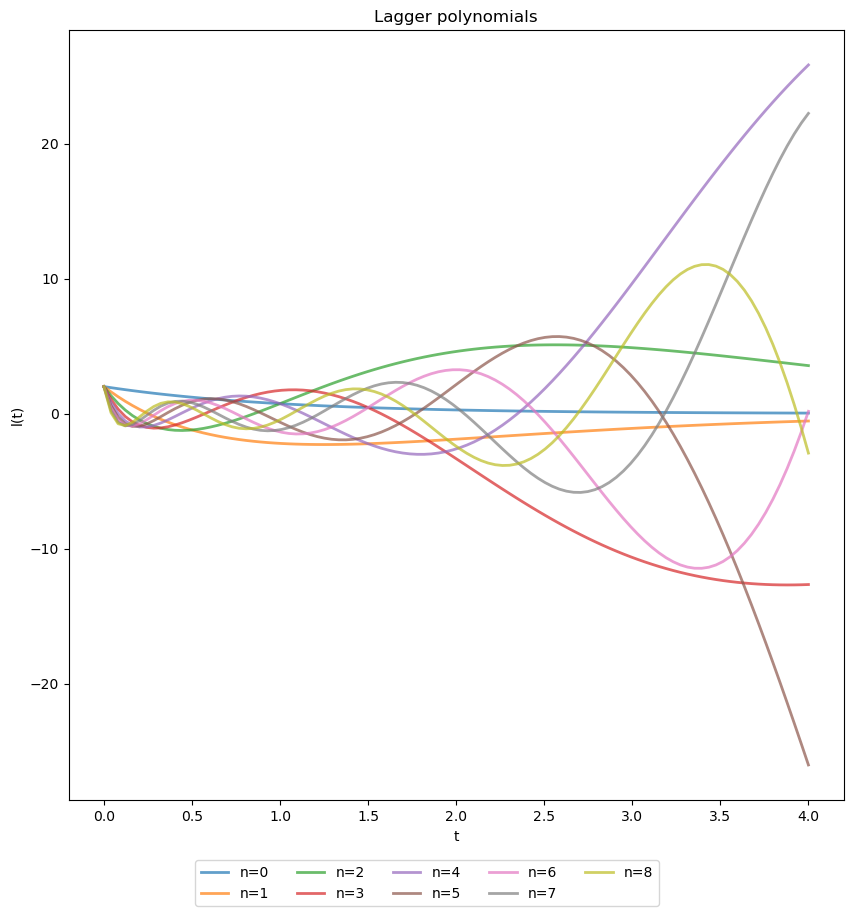

In [104]:
plot_lagger(4,8)

In [105]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


def plot_transformation(f, n, beta=2, gamma=4):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    transform_values = tabulate_transformation(f, n, beta, gamma)
    ax.bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')

    ax.set_xlabel("n")
    ax.set_ylabel("f_n")
    ax.set_title("Transformation")
    ax.set_xticks(range(1, n+1))
    fig.tight_layout()
    plt.axhline(0, color='black')
    plt.show()

# Функція для оновлення графіку при зміні значення віджета
def update_plot(n_value):
    plot_transformation(f, n_value)

# Віджет для значення n
n_widget = widgets.IntSlider(value=5, min=1, max=20, step=1, description='n:')

# Створення інтерактивної панелі
interactive_plot = widgets.interactive(update_plot, n_value=n_widget)

# Відображення віджету та графіку
display(interactive_plot)


interactive(children=(IntSlider(value=5, description='n:', max=20, min=1), Output()), _dom_classes=('widget-in…

Функція `plot_transformation` створює стовпчикову діаграму для візуалізації прямого перетворення Лагерра для заданої функції f(t) та параметрів n, beta, gamma. Розглянемо, як працює цей код:

1. `fig = plt.figure(figsize=(10, 10))`: Створення фігури для малювання графіку розміром 10x10 дюймів.

2. `ax = fig.gca()`: Отримання поточних осей для подальшого малювання на них.

3. `transform_values = tabulate_transformation(f, n, beta, gamma)`: Виклик функції `tabulate_transformation` для обчислення значень прямого перетворення Лагерра для функції f та вказаних параметрів n, beta, gamma.

4. `ax.bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')`: Побудова стовпчикової діаграми, де вісь x відповідає значенням n, а вісь y відповідає значенням прямого перетворення Лагерра. Кожен стовпчик представляється значенням прямого перетворення для конкретного n.

5. `ax.set_xlabel("n")`, `ax.set_ylabel("f_n")`, `ax.set_title("Transformation")`: Задання підписів для осей та заголовку графіку.

6. `ax.set_xticks(range(1, n+1))`: Задання міток для вісі x для кожного значення n.

7. `fig.tight_layout()`: Автоматичне вирівнювання розміщення графіку.

8. `plt.axhline(0, color='black')`: Додавання горизонтальної лінії на рівні 0 для кращого розуміння графіку.

9. `plt.show()`: Відображення побудованого графіку.

Ця функція важлива для візуалізації результатів прямого перетворення Лагерра та допомагає зрозуміти, як змінюються коефіцієнти fn зі збільшенням n.

Цей код викликає функцію plot_transformation з функцією f (sin(t - П/2) + 1) та параметром n=10. Функція plot_transformation будує стовпчикову діаграму для прямого перетворення Лагерра для вказаної функції та значення параметра n.

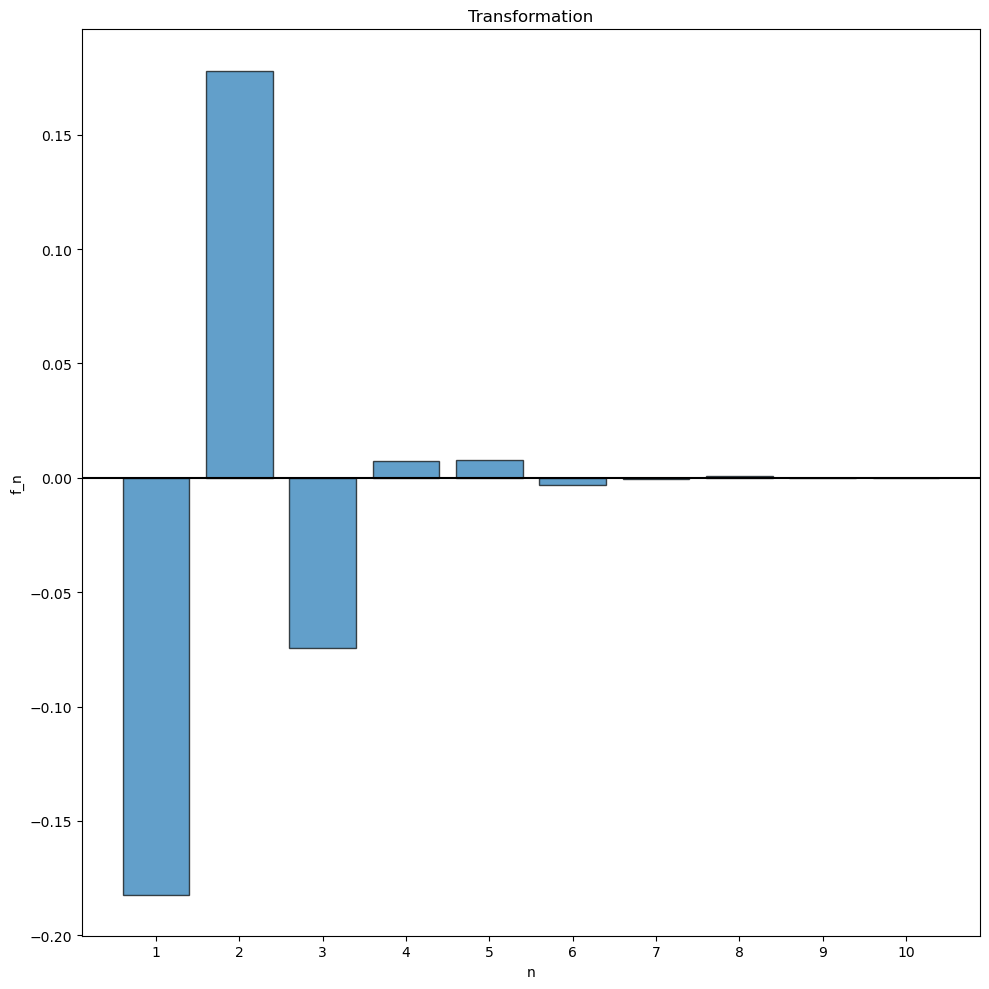

In [106]:
plot_transformation(f, 10)

In [115]:
def plot_tranformations(f, n, beta=2, gamma=4, t1=0, t2=2*np.pi):

    transform_values = tabulate_transformation(f, n, beta, gamma)
    reversed_transform_values = [reversed_lagger_transformation(transform_values, t, beta, gamma) for t in np.linspace(t1, t2, 1000)]
    correct_values = [f(t) for t in np.linspace(t1, t2, 1000)]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.subplots(2, 1)
    ax[0].bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')

    ax[0].set_xlabel("n")
    ax[0].set_ylabel("f_n")
    ax[0].set_title("Transformation coefs")
    ax[0].set_xticks(range(1, n+1))
    fig.tight_layout()
    ax[0].axhline(0, color='black')

    ax[1].plot(np.linspace(t1, t2, 1000), reversed_transform_values, alpha=0.7, linewidth=2.0, label="Reversed transformation")
    ax[1].plot(np.linspace(t1, t2, 1000), correct_values, alpha=0.7, linewidth=2.0, label="Correct function")
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("f(t)")
    ax[1].set_title("Reversed transformation")
    ax[1].legend(loc='lower center', ncol=2)

    plt.show()
    
def update_plot(n, t1, t2):
    plot_tranformations(f, n, t1=t1, t2=t2)

# Віджети для значень
n_widget = widgets.IntSlider(value=5, min=1, max=20, step=1, description='n:')
t1_widget = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1, description='t1:')
t2_widget = widgets.FloatSlider(value=2*np.pi, min=0, max=2*np.pi, step=0.1, description='t2:')

# Створення інтерактивної панелі
interactive_plot = widgets.interactive(update_plot, n=n_widget, t1=t1_widget, t2=t2_widget)

# Відображення віджетів та графіку
display(interactive_plot)

interactive(children=(IntSlider(value=5, description='n:', max=20, min=1), FloatSlider(value=0.0, description=…

Функція `plot_transformations` призначена для візуалізації прямого та оберненого перетворення Лагерра для заданої функції \(f(t)\).

Основні кроки функції:

1. **Пряме перетворення Лагерра**: Обчислюються коефіцієнти прямого перетворення Лагерра за допомогою `tabulate_transformation`. Створюється стовпчикова діаграма, де по горизонтальній вісі відображаються значення \(n\), а по вертикальній - відповідні значення коефіцієнтів \(f_n\).

2. **Обернене перетворення Лагерра та порівняння з вихідною функцією \(f(t)\)**: Використовуються значення прямого перетворення Лагерра для обчислення оберненого перетворення Лагерра через функцію `reversed_lagger_transformation`. Далі побудований графік цього оберненого перетворення порівнюється з вихідною функцією \(f(t)\), щоб визначити, наскільки точно обернене перетворення відтворює вихідну функцію.

3. **Оформлення графіків**: Задаються підписи осей та заголовки для обох графіків для зручності розуміння представленої інформації.

функція дозволяє одночасно порівняти коефіцієнти прямого перетворення Лагерра та відтворення вихідної функції з її оберненим перетворенням.

Виклик функції plot_tranformations візуалізує пряме та обернене перетворення Лагерра для функції (sin(t - П/2) + 1) з використанням 10 коефіцієнтів n. 

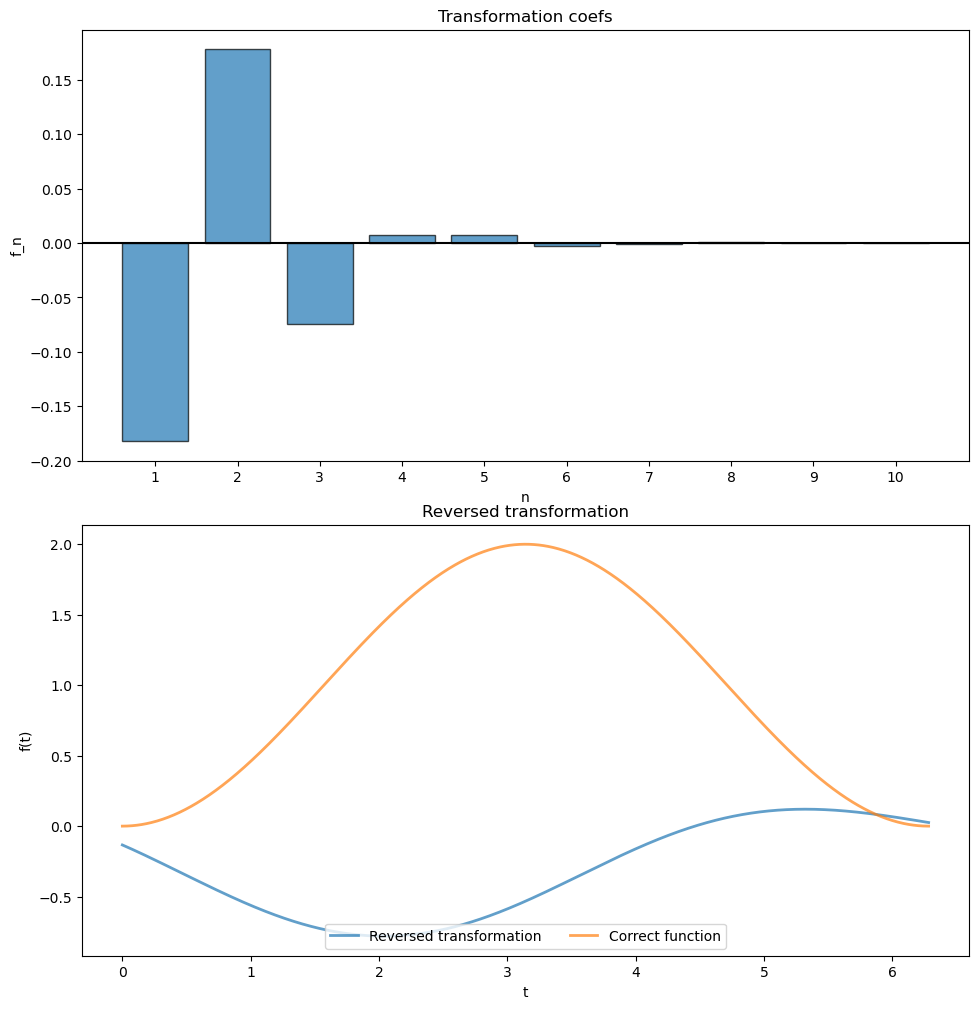

In [138]:
plot_tranformations(f, 10)


In [139]:
def my_f(t):
    if t >= 0 and t <= 4*np.pi:
        return np.sin(t) + 2 * np.cos(2*t) + 0.5 * t**2
    else:
        return 0

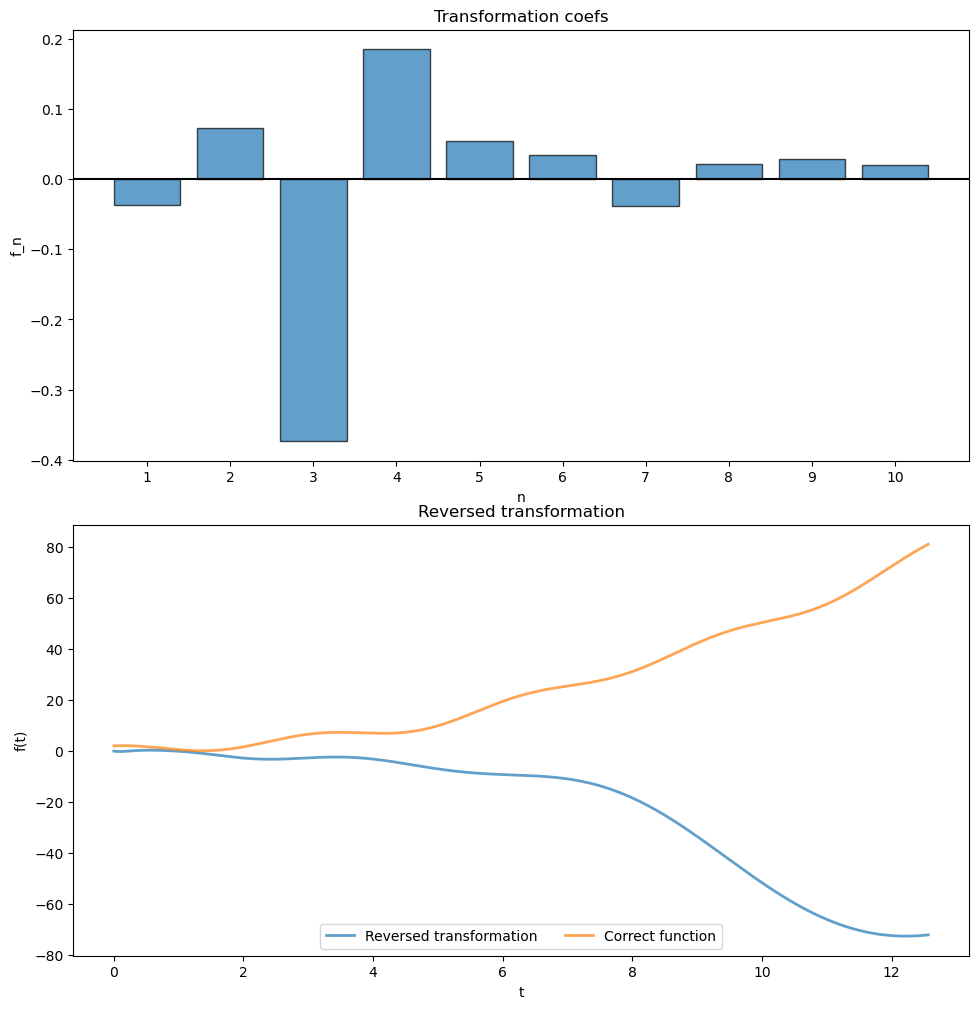

In [140]:
plot_tranformations(my_f, 10,t1=0,t2=4*np.pi)


In [142]:
def my_function():
    def plot_tranformations_wrapper(n, t1, t2):
        plot_tranformations(my_f, n, t1=0, t2=4*np.pi)

    # Віджети для значень
    n_widget = widgets.IntSlider(value=5, min=1, max=20, step=1, description='n:')
    t1_widget = widgets.FloatSlider(value=0, min=0, max=4*np.pi, step=0.1, description='t1:')
    t2_widget = widgets.FloatSlider(value=4*np.pi, min=0, max=4*np.pi, step=0.1, description='t2:')

    # Створення інтерактивної панелі
    interactive_plot = widgets.interactive(plot_tranformations_wrapper, n=n_widget, t1=t1_widget, t2=t2_widget)

    # Відображення віджетів та графіку
    display(interactive_plot)

# Виклик вашої функції
my_function()

interactive(children=(IntSlider(value=5, description='n:', max=20, min=1), FloatSlider(value=0.0, description=…